<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

#### 6. Linear Model Selection and Regularization

In [59]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    install.packages("leaps")
    library(leaps)
    install.packages("pls")
    library(pls)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



[1] "Libraries have been loaded!"


##### Best Subset Selection

In [5]:
names(Hitters)
dim(Hitters)
Hitters = na.omit(Hitters)
dim(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 263  20

[1] 263  20

In [6]:
regfit.full = regsubsets(Salary~., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [10]:
# nvmax=19; fit up to a 19-variable model
regfit.full = regsubsets(Salary~., data=Hitters, nvmax=19)
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [12]:
# R^2 statistic increases monotonically as more variables are included
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

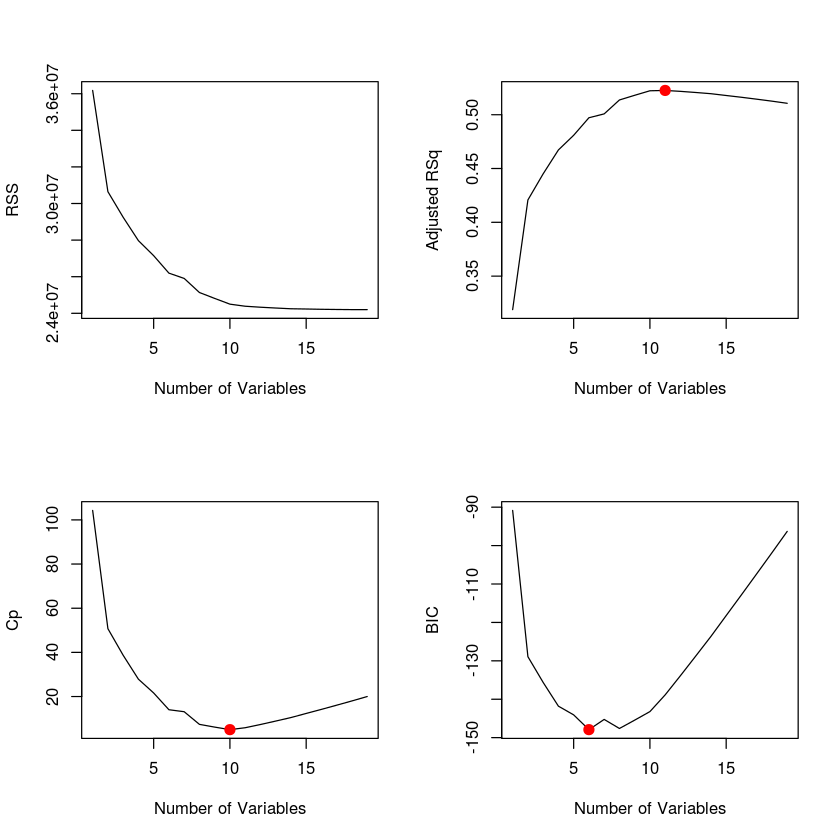

In [21]:
par(mfrow=c(2,2))

plot(reg.summary$rss, xlab="Number of Variables", ylab="RSS", type="l")

plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
# which.max(reg.summary$adjr2) # 11
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

plot(reg.summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
# which.min(reg.summary$cp) # 10
points(10, reg.summary$cp[10], col="red", cex=2, pch=20)

plot(reg.summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
# which.min(reg.summary$bic) # 6
points(6, reg.summary$bic[6], col="red", cex=2, pch=20)

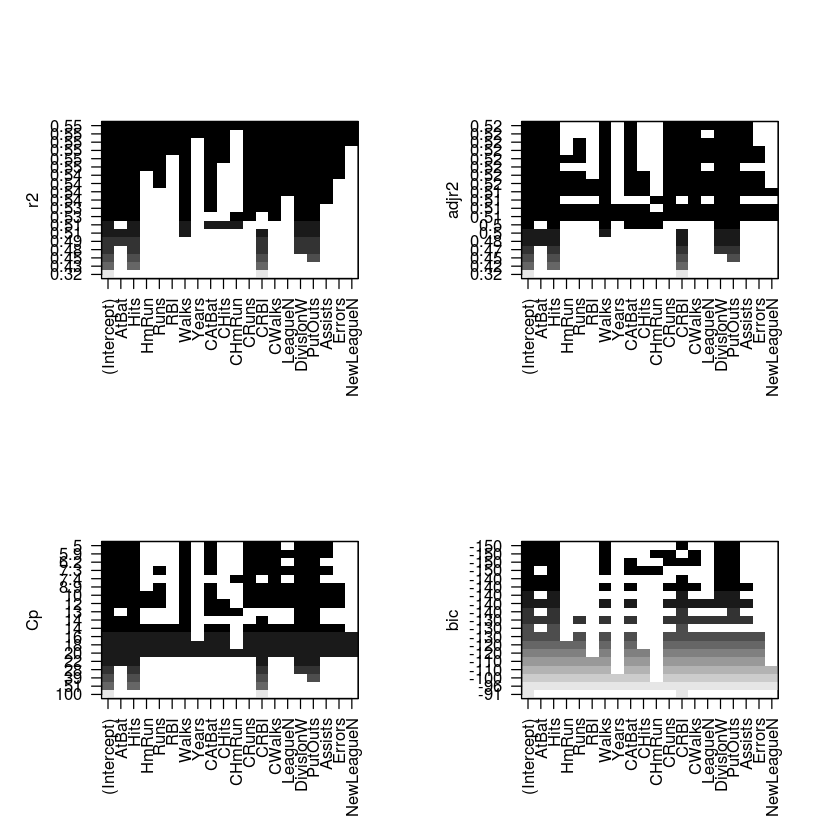

In [22]:
par(mfrow=c(2,2))
plot(regfit.full, scale="r2")
plot(regfit.full, scale="adjr2")
plot(regfit.full, scale="Cp")
plot(regfit.full, scale="bic")

##### Forward and Backward Stepwise Selection

In [26]:
# best 6-variable model
coef(regfit.full, 6)

# best 7-variable model
coef(regfit.full, 7)

regfit.fwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
coef(regfit.fwd, 7)

regfit.bwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="backward")
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

##### Choosing among Models Using Validation Set Approach and Cross-Validation

In [29]:
set.seed(1)
train = sample(c(TRUE,FALSE), nrow(Hitters), rep=TRUE)
test = (!train)

In [31]:
# training set to perform best subset selection
regfit.best = regsubsets(Salary~., data=Hitters[train,], nvmax=19)
test.mat = model.matrix(Salary~., data=Hitters[test,])

val.errors = rep(NA, 19)
for (i in 1:19) {
    coefi = coef(regfit.best, id=i)
    pred = test.mat[,names(coefi)]%*%coefi
    val.errors[i] = mean((Hitters$Salary[test]-pred)^2)
}

val.errors

which.min(val.errors) # 10
coef(regfit.best, 10)

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

[1] 10

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

In [32]:
# simplify
predict.regsubsets = function(object, newdata, id, ...) {
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id=id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

# 10-variable cross-validation
regfit.best = regsubsets(Salary~., data=Hitters, nvmax=19)
coef(regfit.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

In [33]:
# choose among models of different sizes using cross-validation
k=10
set.seed(1)
folds = sample(1:k, nrow(Hitters), replace=TRUE)
cv.errors = matrix(NA, k, 19, dimnames=list(NULL,paste(1:19)))

for (j in 1:k) {
    best.fit = regsubsets(Salary~., data=Hitters[folds!=j,], nvmax=19)
    for (i in 1:19) {
        pred = predict(best.fit, Hitters[folds==j,], id=i)
        cv.errors[j,i] = mean((Hitters$Salary[folds=j]-pred)^2)
    }
}

cv.errors

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
161589.21,134720.77,175609.84,198673.44,163058.33,187735.0,230849.08,182089.92,196143.88,167448.99,164797.57,184505.02,185617.95,178477.4,177203.81,176714.31,176311.98,175786.90,176118.63
53005.28,54254.19,54648.66,63926.67,68684.54,67695.0,72457.39,78445.74,75871.42,81779.25,81053.12,80262.23,79951.19,81465.0,82181.34,81520.93,80903.89,81026.33,81105.13
75543.95,108377.55,108521.08,118170.40,122773.28,113792.8,115104.03,124403.29,128638.76,122461.90,120101.01,118923.29,123627.67,124455.2,125589.63,130240.08,131808.70,131642.25,132041.41
239576.12,275319.15,278989.30,277262.03,277442.90,295895.2,264534.61,280583.56,279721.64,275870.67,273478.20,270525.01,264796.61,266654.5,265173.19,263313.45,261276.01,262052.40,262051.02
127156.27,147295.41,153669.22,151891.48,169471.15,167751.0,164711.80,169718.72,165833.99,162317.26,159616.86,160458.09,162266.40,161525.6,167082.68,167563.15,167381.39,167052.13,167221.08
298889.46,407253.74,441972.02,447134.53,460334.89,440631.0,417874.32,467910.98,481640.65,479624.37,488246.78,492501.57,490038.71,494249.6,495930.91,500075.56,499567.86,494020.38,497582.47
217530.31,256874.02,258091.15,239361.08,225441.62,225446.7,235108.16,227608.43,240999.94,234266.64,244922.75,247900.31,247275.54,248719.1,251381.64,248823.49,248442.26,248163.98,248283.25
248416.62,310048.99,299697.80,305361.54,290680.20,296815.1,298924.05,311364.36,314004.46,314870.21,317916.27,323344.92,324622.75,331915.6,334575.70,333294.22,335266.59,335495.27,336155.20
427049.14,450472.92,448354.47,445842.00,446489.65,441725.6,437969.71,436487.78,436717.24,435445.00,434613.23,434184.59,438079.96,432220.4,431962.23,433056.82,432738.35,432471.07,431998.93
196083.16,170293.12,270760.66,300590.57,316674.91,334324.2,322979.97,279717.72,292627.14,277488.80,250957.72,248974.22,303054.14,303591.7,278570.49,275561.18,290318.80,289292.34,289062.90


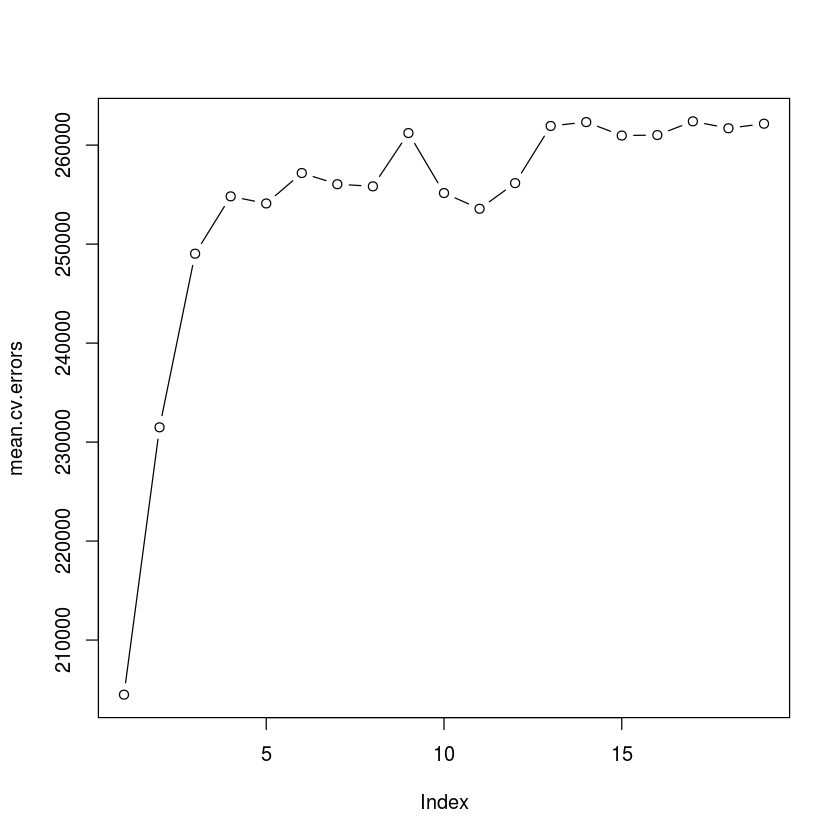

In [36]:
mean.cv.errors = apply(cv.errors, 2, mean)
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')

# cross-validation selects an 11-variable model

In [37]:
reg.best = regsubsets(Salary~., data=Hitters, nvmax=19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

##### Ridge Regression

In [40]:
library(glmnet)

# model.matrix to produce a matrix with 19 predictors
# also automatically transforms any qualitative variables into dummy variables
x = model.matrix(Salary~., Hitters)[,-1]
y = Hitters$Salary
grid = 10^seq(10, -2, length=100)

# alpha=0 for ridge regression
# alpha=1 for lasso
# automatically standardize variables
ridge.mod = glmnet(x, y, alpha=0, lambda=grid)
dim(coef(ridge.mod))

[1]  20 100

In [42]:
# λ = 11498
ridge.mod$lambda[50]

# much larger λ, much smaller coefficients
coef(ridge.mod)[,50]

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [43]:
# λ = 705
ridge.mod$lambda[60]
coef(ridge.mod)[,60]

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [45]:
# λ = 50
predict(ridge.mod, s=50, type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [46]:
# split samples into training set and test set
# to estimate test error of ridge regression, lasso
set.seed(1)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)
y.test = y[test]

In [47]:
# fit ridge regression with λ = 4
ridge.mod = glmnet(x[train,], y[train], alpha=0, lambda=grid, thresh=1e-12)
ridge.pred = predict(ridge.mod, s=4, newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 101036.8

In [48]:
# test set MSE
mean((mean(y[train])-y.test)^2)

[1] 193253.1

In [49]:
# same as fitting ridge regression with very large λ
ridge.pred = predict(ridge.mod, s=1e10, newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 193253.1

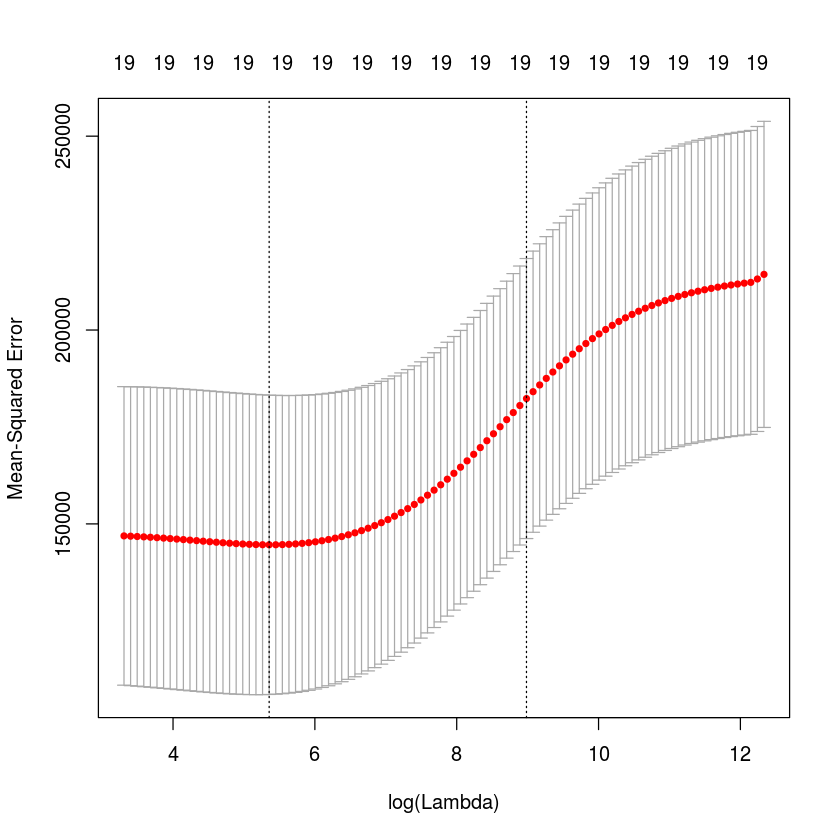

In [50]:
# use cross-validation to choose λ
set.seed(1)
cv.out = cv.glmnet(x[train,], y[train], alpha=0)
plot(cv.out)

In [51]:
# λ with smallest cross-validation error
bestlam = cv.out$lambda.min
bestlam

[1] 211.7416

In [52]:
# test MSE with λ
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 96015.51

In [53]:
out = glmnet(x, y, alpha=0)
predict(out, type="coefficients", s=bestlam)[1:20]

[1]   9.88487157   0.03143991   1.00882875   0.13927624   1.11320781
 [6]   0.87318990   1.80410229   0.13074381   0.01113978   0.06489843
[11]   0.45158546   0.12900049   0.13737712   0.02908572  27.18227535
[16] -91.63411299   0.19149252   0.04254536  -1.81244470   7.21208390

##### Lasso

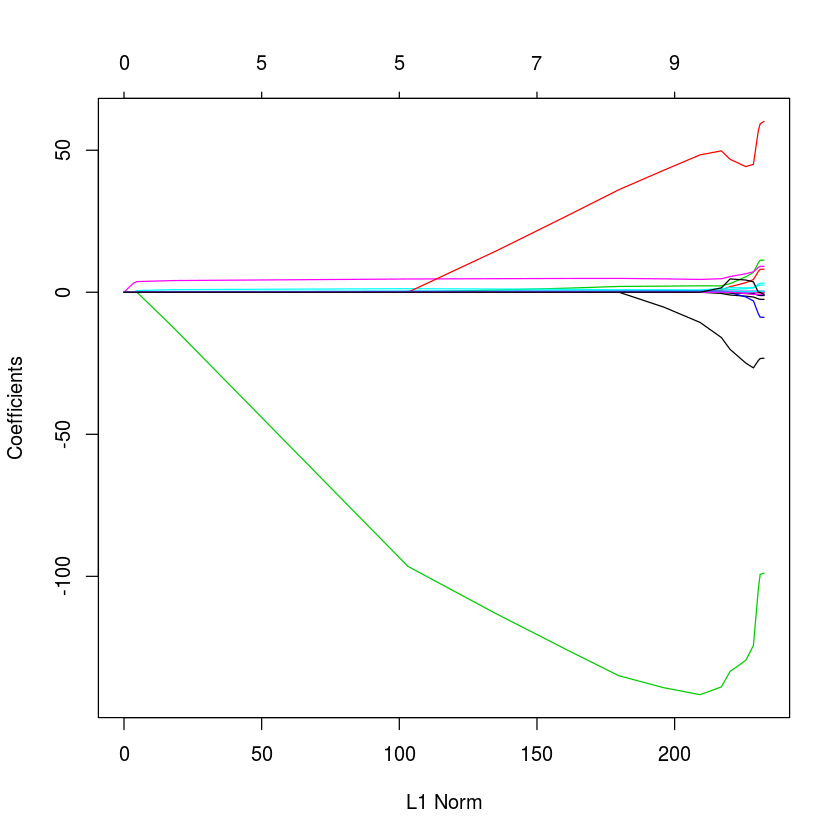

In [54]:
lasso.mod = glmnet(x[train,], y[train], alpha=1, lambda=grid)
plot(lasso.mod)

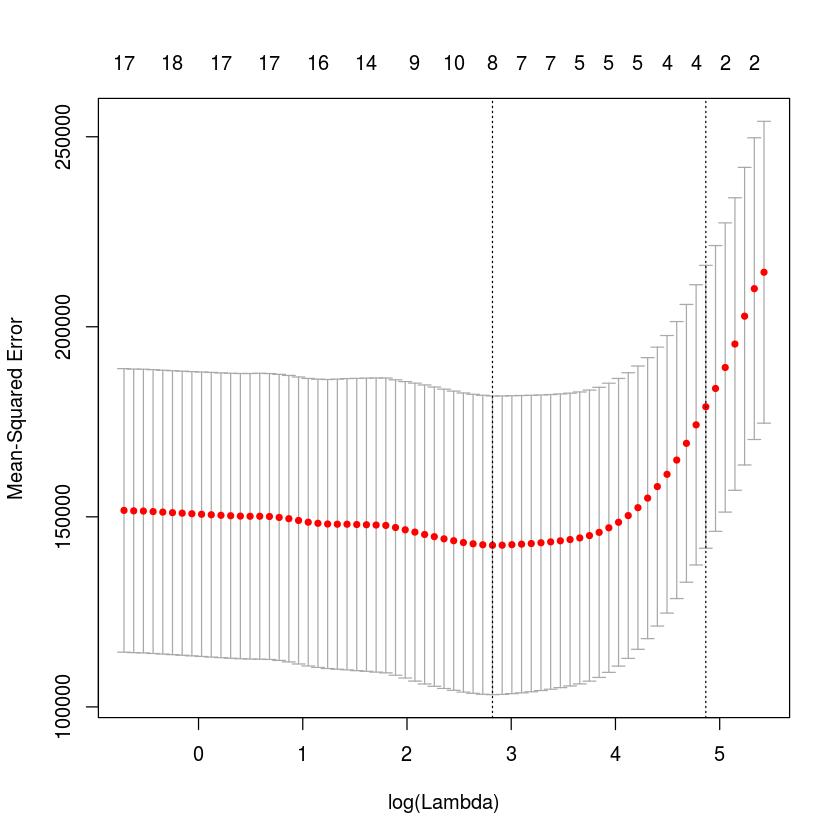

In [55]:
set.seed(1)
cv.out = cv.glmnet(x[train,], y[train], alpha=1)
plot(cv.out)

In [56]:
bestlam = cv.out$lambda.min
lasso.pred = predict(lasso.mod, s=bestlam, newx=x[test,])
mean((lasso.pred-y.test)^2)

[1] 100743.4

In [57]:
out = glmnet(x, y, alpha=1, lambda=grid)
lasso.coef = predict(out, type="coefficients", s=bestlam)[1:20,]
lasso.coef

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

##### Principal Components Regression

In [61]:
set.seed(2)
pcr.fit = pcr(Salary~., data=Hitters, scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

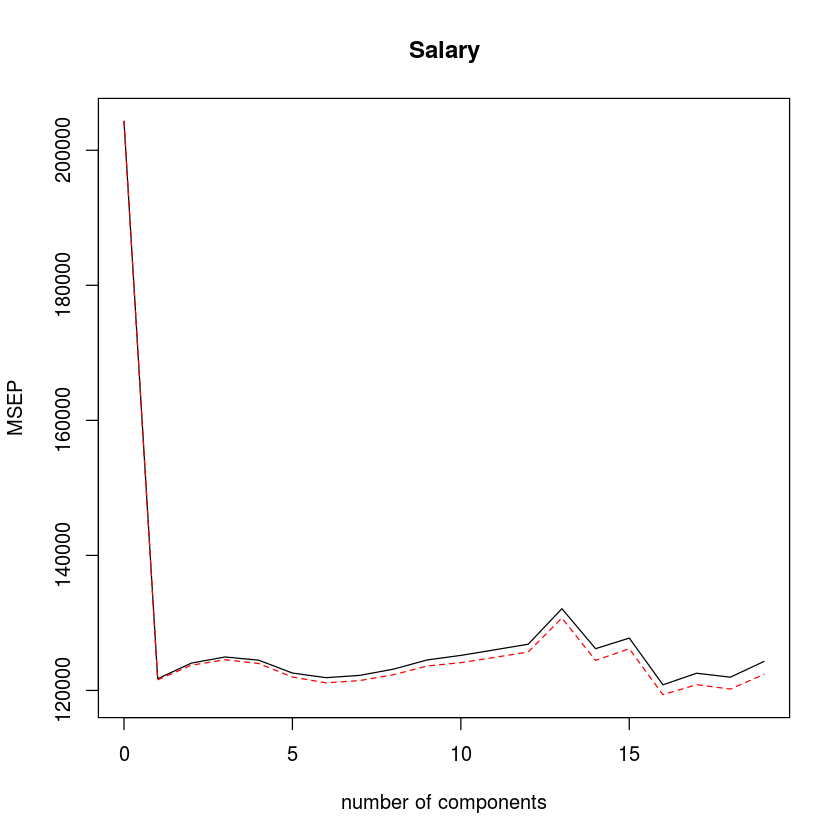

In [62]:
validationplot(pcr.fit, val.type="MSEP")

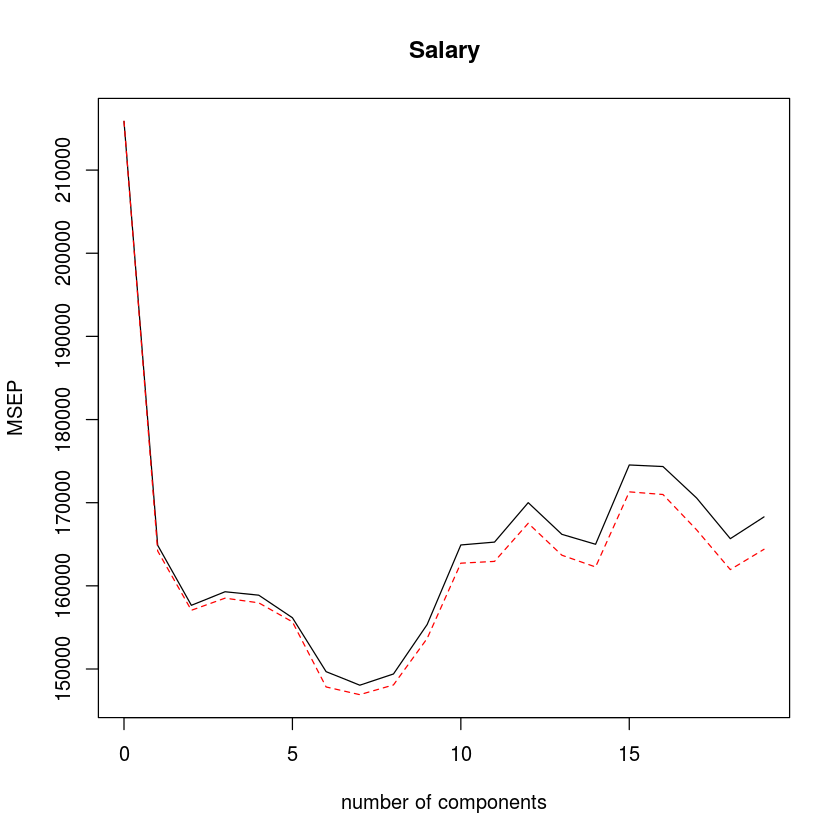

In [63]:
set.seed(1)
pcr.fit = pcr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [64]:
pcr.pred = predict(pcr.fit, x[test,], ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

In [65]:
# M = 7
pcr.fit = pcr(y~x, scale=TRUE, ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


##### Partial Least Squares (PLS)

In [66]:
set.seed(1)
pls.fit = plsr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

In [67]:
pls.pred = predict(pls.fit, x[test,], ncomp=2)
mean((pls.pred-y.test)^2)

[1] 101417.5

In [68]:
pls.fit = plsr(Salary~., data=Hitters, subset=train, scale=TRUE, ncomp=2)
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.12    53.46
Salary    33.58    38.96
